# Prediction

In [1]:
!pip3 install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.feature_selection import SelectFromModel

In [3]:
df = pd.read_csv("processed.csv")
df.head()

,Player,Team,#,Nation,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
0,0,0,3,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,3,0,18,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,0,8,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,30,0,90,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
y = df["Goals"]
X = df.drop(columns=["Goals"])

In [5]:
numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Scale only the numeric columns
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_columns])

# Convert scaled numeric data back to a DataFrame
X_scaled_numeric_df = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X.index)

# Combine scaled numeric data with non-numeric data
X_scaled = pd.concat([X_scaled_numeric_df, X[non_numeric_columns]], axis=1)

# Check the result
X_scaled.describe()

,Player,Team,#,Nation,Minutes,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
count,3349.000000,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,...,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03
mean,0.000000,-1.357860e-16,5.622390e-17,-6.789301e-17,1.294210e-16,-3.288567e-17,-2.758153e-17,1.060828e-17,3.394650e-17,4.667644e-17,...,-1.697325e-17,-5.091975e-17,-5.091975e-17,-2.545988e-17,-4.667644e-17,-4.243313e-17,-4.243313e-18,-1.485159e-17,-2.545988e-17,1.060828e-17
std,1.000149,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-1.724062,-1.650974e+00,-1.300449e+00,-9.494908e-01,-2.043811e+00,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
25%,-0.852056,-7.785439e-01,-7.249618e-01,-9.494908e-01,-9.882373e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
50%,0.027600,-8.060011e-02,-1.494749e-01,-3.402603e-01,5.791294e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
75%,0.853712,7.918296e-01,5.904368e-01,6.751238e-01,8.030390e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,9.904265e-02,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
max,1.741017,1.664259e+00,5.769819e+00,2.705892e+00,8.030390e-01,1.101645e+01,1.490861e+01,1.323870e+01,5.720972e+00,7.488632e+00,...,3.205635e+00,3.753077e+00,3.136589e+00,3.425469e+00,2.595074e+00,3.205635e+00,2.253451e+00,3.039998e+00,4.088958e+00,4.233309e+00


# Train ML Model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
y_test.value_counts()

Goals
0    620
1     46
2      3
4      1
Name: count, dtype: int64

In [8]:
# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))

# Feature selection based on importance
selector = SelectFromModel(rf, threshold=0.01).fit(X_train, y_train)

# Transform training and test data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Display selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

RollingAvgGoals          0.397287
Shoot on Target          0.196582
Expected Goals (xG)      0.108990
Player                   0.018542
TeamPassAccuracy         0.016434
Age                      0.016146
#                        0.015463
Pass Completion %        0.014851
TeamxG                   0.013978
Shot-Creating Actions    0.011661
dtype: float64
Selected features: ['Player', '#', 'Shoot on Target', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)', 'Shot-Creating Actions', 'Pass Completion %', 'Carries', 'Age', 'TeamxG', 'TeamPassAccuracy', 'RollingAvgGoals']


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04185537313432836


In [10]:
# Evaluate baseline model

from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test_selected)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.041105223880597015
Mean Absolute Error: 0.055179104477611936


# Convert target to logscale

In [11]:
y = np.log1p(df["Goals"])  # Log transform to handle skewed distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42, criterion='absolute_error')
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test_selected)

y_pred = np.expm1(y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.019643724827558898
Mean Absolute Error: 0.05924418841612798


# Inspect Results
Check to see if the model is simply taking advantage of the data imbalance (i.e., is it always predicting 0?)

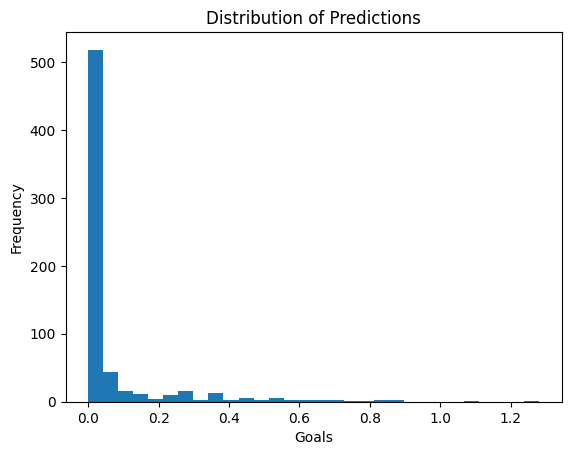

In [12]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=30)
plt.title('Distribution of Predictions')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

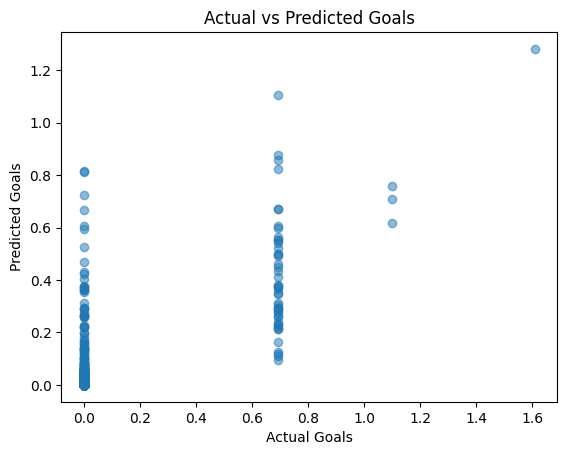

In [13]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual vs Predicted Goals')
plt.show()

Confusion Matrix:
[[613   7   0   0]
 [ 33  13   0   0]
 [  0   3   0   0]
 [  0   1   0   0]]
Class-Level Accuracy: [0.98870968 0.2826087  0.         0.        ]


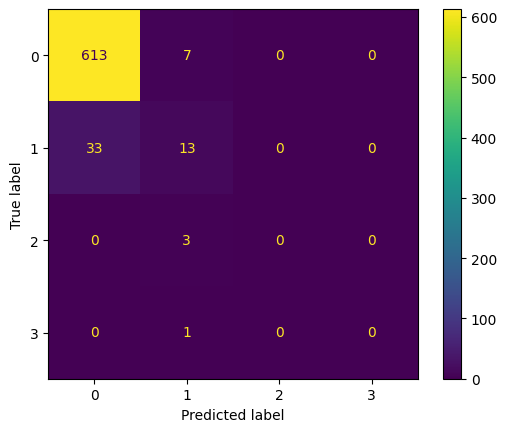

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Inverse transform y_test
y_test_original = np.expm1(y_test)  # Convert back to original scale

# Round predictions and true values for comparison
y_test_int = np.round(y_test_original).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

# Print confusion matrix and class-level accuracy
print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

In [15]:
# This is a flawed metric. The model can predict 0.1, for example, which would not be considered 0. 
print(f"Proportion of zeros in predictions: {sum(y_pred == 0) / len(y_pred)}")
print(f"Proportion of zeros in actuals: {sum(y_test == 0) / len(y_test)}")

Proportion of zeros in predictions: 0.3895522388059702
Proportion of zeros in actuals: 0.9253731343283582


### Strategy: Use weights based on class frequencies. Give more attention to less frequent classes

In [16]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train)
rf_selected.fit(X_train_selected, y_train, sample_weight=sample_weights)

RandomForestRegressor(criterion='absolute_error', random_state=42)

In [17]:
y_pred = rf_selected.predict(X_test_selected)
y_pred = np.expm1(y_pred)

Confusion Matrix:
[[606  14   0   0]
 [ 17  29   0   0]
 [  0   3   0   0]
 [  0   1   0   0]]
Class-Level Accuracy: [0.97741935 0.63043478 0.         0.        ]


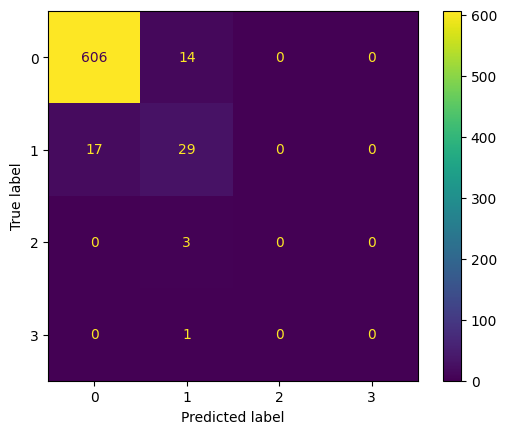

In [18]:
# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Inverse transform y_test
y_test_original = np.expm1(y_test)  # Convert back to original scale

# Round predictions and true values for comparison
y_test_int = np.round(y_test_original).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

# Print confusion matrix and class-level accuracy
print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

### Add SMOTE to balance the training data

In [ ]:
import smogn



ERROR: Could not find a version that satisfies the requirement imbalanced-regression (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for imbalanced-regression


# Gradient Boosting

# More to do later: 
- Is it always predicting 0 and getting a high score since it's an unbalanced dataset? 

In [ ]:
df.info()

---

## No Longer Doing This
### Finding optimal `n_components` for PCA

In [ ]:
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [ ]:
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

In [ ]:
# Sort features by their contribution to PC1
important_features_pc1 = loadings_df.loc['PC1'].abs().sort_values(ascending=False)
print(important_features_pc1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 10 features
print(feature_importances.head(10))